<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea5/Minimo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [20]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/datos/")
!ls

MinimosCuadratico.txt  MinimosLineal.txt


In [25]:
file = '/content/drive/MyDrive/Colab Notebooks/datos/MinimosCuadratico.txt'
file


'/content/drive/MyDrive/Colab Notebooks/datos/MinimosCuadratico.txt'

In [26]:

data = pd.read_csv(file)
data.head(10)

,0.000000e+00 -3.348886e+00
0,5.263158e-01 1.077900e+01
1,1.052632e+00 1.312721e+01
2,1.578947e+00 2.120879e+01
3,2.105263e+00 2.063223e+01
4,2.631579e+00 3.411089e+01
5,3.157895e+00 6.066644e+01
6,3.684211e+00 5.507888e+01
7,4.210526e+00 8.189598e+01
8,4.736842e+00 9.683438e+01
9,5.263158e+00 1.175549e+02


In [27]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
data

,x,y
0,0.526316,10.77900
1,1.052632,13.12721
2,1.578947,21.20879
3,2.105263,20.63223
4,2.631579,34.11089
5,3.157895,60.66644
6,3.684211,55.07888
7,4.210526,81.89598
8,4.736842,96.83438
9,5.263158,117.55490


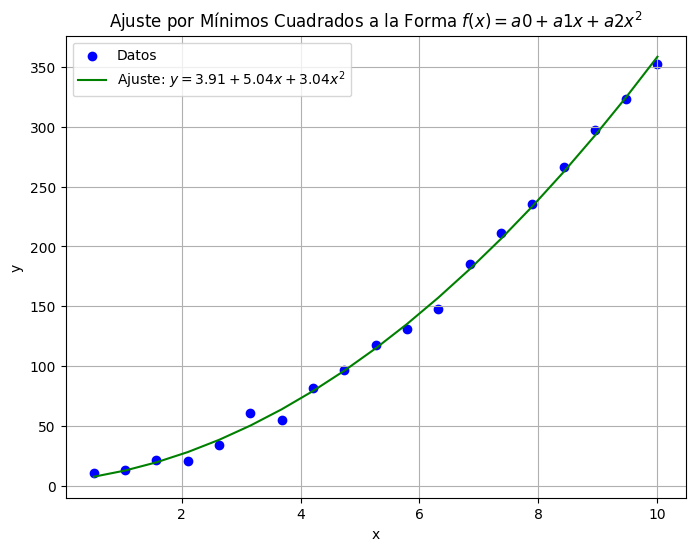

(3.9143938763858506, 5.042292840164356, 3.0417187054985053)

In [28]:
# Para este ajuste usaremos una función cuadrática de la forma f(x) = a0 + a1*x + a2*x^2
x_data = data['x']
y_data = data['y']
# Matriz de diseño para el ajuste a la forma f(x) = a0 + a1 * x + a2 * x^2
A_quad = np.vstack([np.ones(len(x_data)), x_data, x_data**2]).T
coeffs_quad, _, _, _ = lstsq(A_quad, y_data)  # a0, a1, y a2 son los parámetros encontrados
a0_quad, a1_quad, a2_quad = coeffs_quad

# Calcular la curva de ajuste
y_fit_quad = a0_quad + a1_quad * x_data + a2_quad * x_data**2

# Graficar datos y ajuste cuadrático
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color='blue', label='Datos')
plt.plot(x_data, y_fit_quad, color='green', label=f'Ajuste: $y = {a0_quad:.2f} + {a1_quad:.2f}x + {a2_quad:.2f}x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Ajuste por Mínimos Cuadrados a la Forma $f(x) = a0 + a1x + a2x^2$")
plt.legend()
plt.grid(True)
plt.show()

a0_quad, a1_quad, a2_quad
